In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **Import Library**


In [ ]:
pip install pandas==0.24.0

     |████████████████████████████████| 10.1MB 5.5MB/s 
ERROR: xarray 0.15.1 has requirement pandas>=0.25, but you'll have pandas 0.24.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement pandas>=0.25.0, but you'll have pandas 0.24.0 which is incompatible.
ERROR: mizani 0.6.0 has requirement pandas>=0.25.0, but you'll have pandas 0.24.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 0.24.0 which is incompatible.
ERROR: fbprophet 0.7.1 has requirement pandas>=1.0.4, but you'll have pandas 0.24.0 which is incompatible.
  Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5


In [ ]:
import numpy as np
import pandas as pd
print(pd.__version__)
import matplotlib
import matplotlib.pyplot as plt
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
from sklearn.utils import shuffle

0.24.0
TensorFlow 1.x selected.
1.15.2


# **Get Data UCIHAR**

In [ ]:
# mengambil fitur dari file features.txt
features = list()
with open('/content/gdrive/MyDrive/Colab Notebooks/Dataset fresh/UCIHAR/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


**Obtain Train data**

In [ ]:
X_train = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Dataset fresh/UCIHAR/train/X_train.txt', delim_whitespace=True, header=None, names=features)

# menambahkan subjek pada dataframe
X_train['subject'] = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Dataset fresh/UCIHAR/train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Dataset fresh/UCIHAR/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# mengabungkan file menjadi 1 dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
1075,0.268239,-0.017527,-0.129724,-0.970175,-0.961665,-0.973918,-0.977965,-0.967754,-0.978015,-0.889782,-0.535161,-0.817666,0.804522,0.656884,0.809504,-0.969921,-0.999412,-0.999574,-0.998656,-0.987821,-0.977046,-0.984346,-0.413504,-0.468955,-0.856019,-0.256245,0.407035,-0.412352,0.360425,0.294211,0.043963,0.061644,0.410682,-0.040771,0.199107,-0.219372,-0.160406,0.40307,-0.22404,-0.064493,...,-0.968254,-0.235778,-0.271537,-0.744849,-0.90822,-0.915746,-0.898923,-0.938589,-0.972897,-0.90822,-0.994962,-0.895213,-0.082365,-0.948718,-0.146563,-0.582206,-0.866017,-0.949361,-0.941458,-0.939021,-0.952563,-0.965584,-0.949361,-0.998284,-0.95387,-0.392931,-0.968254,-0.110636,-0.249962,-0.697744,-0.000449,0.300385,0.605803,-0.903288,0.600924,-0.97816,0.045104,6,6,LAYING


In [ ]:
train.shape

(7352, 564)

In [ ]:
train['ActivityName'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: ActivityName, dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 564 entries, tBodyAccmeanX to ActivityName
dtypes: float64(561), int64(2), object(1)
memory usage: 31.6+ MB


In [ ]:
train.describe()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,tBodyAccmaxY,tBodyAccmaxZ,tBodyAccminX,tBodyAccminY,tBodyAccminZ,tBodyAccsma,tBodyAccenergyX,tBodyAccenergyY,tBodyAccenergyZ,tBodyAcciqrX,tBodyAcciqrY,tBodyAcciqrZ,tBodyAccentropyX,tBodyAccentropyY,tBodyAccentropyZ,tBodyAccarCoeffX1,tBodyAccarCoeffX2,tBodyAccarCoeffX3,tBodyAccarCoeffX4,tBodyAccarCoeffY1,tBodyAccarCoeffY2,tBodyAccarCoeffY3,tBodyAccarCoeffY4,tBodyAccarCoeffZ1,tBodyAccarCoeffZ2,tBodyAccarCoeffZ3,tBodyAccarCoeffZ4,tBodyAcccorrelationXY,tBodyAcccorrelationXZ,tBodyAcccorrelationYZ,...,fBodyBodyAccJerkMagentropy,fBodyBodyAccJerkMagmaxInds,fBodyBodyAccJerkMagmeanFreq,fBodyBodyAccJerkMagskewness,fBodyBodyAccJerkMagkurtosis,fBodyBodyGyroMagmean,fBodyBodyGyroMagstd,fBodyBodyGyroMagmad,fBodyBodyGyroMagmax,fBodyBodyGyroMagmin,fBodyBodyGyroMagsma,fBodyBodyGyroMagenergy,fBodyBodyGyroMagiqr,fBodyBodyGyroMagentropy,fBodyBodyGyroMagmaxInds,fBodyBodyGyroMagmeanFreq,fBodyBodyGyroMagskewness,fBodyBodyGyroMagkurtosis,fBodyBodyGyroJerkMagmean,fBodyBodyGyroJerkMagstd,fBodyBodyGyroJerkMagmad,fBodyBodyGyroJerkMagmax,fBodyBodyGyroJerkMagmin,fBodyBodyGyroJerkMagsma,fBodyBodyGyroJerkMagenergy,fBodyBodyGyroJerkMagiqr,fBodyBodyGyroJerkMagentropy,fBodyBodyGyroJerkMagmaxInds,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,-0.306043,-0.557121,0.523551,0.387386,0.594374,-0.547569,-0.820041,-0.901874,-0.845784,-0.684345,-0.643770,-0.631069,-0.102993,-0.137937,-0.163946,-0.116599,0.102762,-0.037786,0.130477,-0.026229,0.026322,0.159966,-0.019575,0.009420,0.033291,0.036587,-0.078640,-0.125131,-0.193802,0.105005,...,-0.347657,-0.877995,0.178195,-0.312968,-0.615441,-0.693210,-0.692876,-0.674830,-0.726645,-0.885103,-0.693210,-0.874292,-0.719795,-0.087878,-0.889442,-0.046516,-0.253649,-0.565425,-0.779376,-0.792391,-0.772836,-0.811409,-0.871927,-0.779376,-0.935785,-0.771497,-0.284627,-0.898859,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085,3.643362
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,0.282243,0.293867,0.363594,0.343611,0.297818,0.471808,0.259607,0.126333,0.221983,0.371608,0.371581,0.386569,0.468959,0.437268,0.371363,0.306507,0.246593,0.243635,0.230067,0.257383,0.215001,0.208837,0.221432,0.286081,0.216289,0.236226,0.232757,0.363155,0.331122,0.385379,...,0.670112,0.188636,0.253755,0.358631,0.345329,0.335026,0.322850,0.343454,0.293098,0.173574,0.335026,0.192684,0.318706,0.611793,0.157653,0.282665,0.326624,0.326620,0.275733,0.265434,0.287613,0.246680,0.193344,0.275733,0.138683,0.287577,0.630896,0.143135,0.250994,0.321011,0.307584,0

In [ ]:
train.mean()

tBodyAccmeanX                         0.274488
tBodyAccmeanY                        -0.017695
tBodyAccmeanZ                        -0.109141
tBodyAccstdX                         -0.605438
tBodyAccstdY                         -0.510938
tBodyAccstdZ                         -0.604754
tBodyAccmadX                         -0.630512
tBodyAccmadY                         -0.526907
tBodyAccmadZ                         -0.606150
tBodyAccmaxX                         -0.468604
tBodyAccmaxY                         -0.306043
tBodyAccmaxZ                         -0.557121
tBodyAccminX                          0.523551
tBodyAccminY                          0.387386
tBodyAccminZ                          0.594374
tBodyAccsma                          -0.547569
tBodyAccenergyX                      -0.820041
tBodyAccenergyY                      -0.901874
tBodyAccenergyZ                      -0.845784
tBodyAcciqrX                         -0.684345
tBodyAcciqrY                         -0.643770
tBodyAcciqrZ 

**Obtain Test data**

In [ ]:
X_test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Dataset fresh/UCIHAR/test/X_test.txt', delim_whitespace=True, header=None, names=features)

# menambahkan subjek pada dataframe
X_test['subject'] = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Dataset fresh/UCIHAR/test/subject_test.txt', header=None, squeeze=True)

# mengambil label pada file txt
y_test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Dataset fresh/UCIHAR/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
2374,0.151578,-0.093995,-0.275779,-0.286661,-0.10155,-0.242151,-0.345347,-0.056792,-0.240376,0.034086,-0.178976,-0.423594,0.145654,0.21055,0.345686,-0.113535,-0.741072,-0.832856,-0.69858,-0.47776,-0.179393,-0.293131,0.047663,0.044658,-0.244315,-0.440681,0.323951,-0.116154,0.151126,-0.37624,0.276265,-0.083523,0.159737,-0.255419,0.225064,-0.124375,0.094925,-0.123866,-0.273491,0.377661,...,-0.936508,-0.170601,-0.48601,-0.856107,-0.47387,-0.454896,-0.430707,-0.515756,-0.997586,-0.47387,-0.819425,-0.472724,0.573179,-0.692308,-0.103084,-0.31137,-0.658423,-0.537446,-0.53203,-0.428374,-0.697893,-0.822997,-0.537446,-0.883891,-0.34351,0.462017,-0.936508,-0.163358,-0.533366,-0.870122,-0.023038,0.116035,-0.847003,0.36524,-0.546967,0.371804,0.167771,20,2,WALKING_UPSTAIRS


In [ ]:

test.shape

(2947, 564)

In [ ]:
test['ActivityName'].value_counts()

LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: ActivityName, dtype: int64



# **Data Cleaning**



## **1. Check Duplicates**

In [ ]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


## **2. Checking for NaN/null values**

In [ ]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


## **3. Check for data imbalance**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

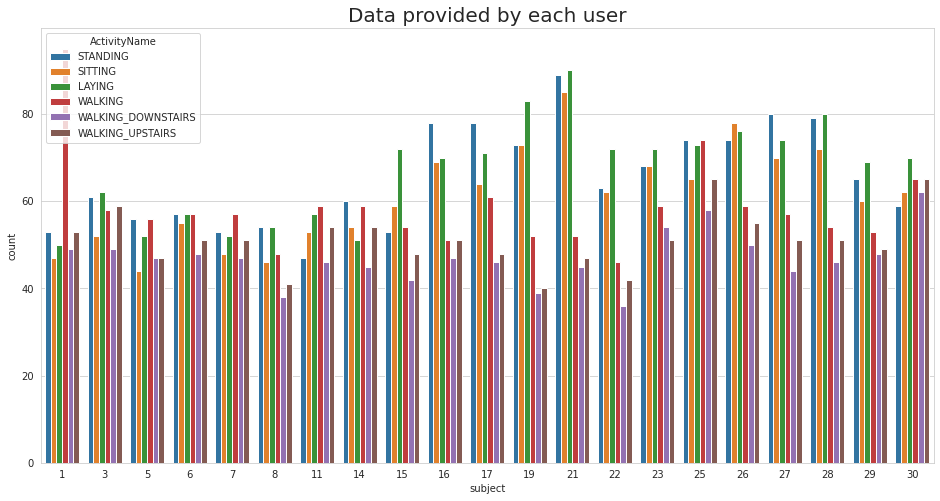

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()

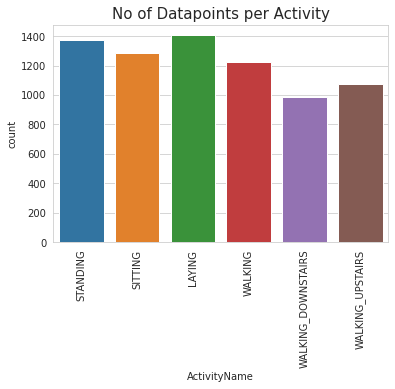

In [ ]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

## **4. Changing feature names**

In [ ]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

In [ ]:
list(columns)

['tBodyAccmeanX',
 'tBodyAccmeanY',
 'tBodyAccmeanZ',
 'tBodyAccstdX',
 'tBodyAccstdY',
 'tBodyAccstdZ',
 'tBodyAccmadX',
 'tBodyAccmadY',
 'tBodyAccmadZ',
 'tBodyAccmaxX',
 'tBodyAccmaxY',
 'tBodyAccmaxZ',
 'tBodyAccminX',
 'tBodyAccminY',
 'tBodyAccminZ',
 'tBodyAccsma',
 'tBodyAccenergyX',
 'tBodyAccenergyY',
 'tBodyAccenergyZ',
 'tBodyAcciqrX',
 'tBodyAcciqrY',
 'tBodyAcciqrZ',
 'tBodyAccentropyX',
 'tBodyAccentropyY',
 'tBodyAccentropyZ',
 'tBodyAccarCoeffX1',
 'tBodyAccarCoeffX2',
 'tBodyAccarCoeffX3',
 'tBodyAccarCoeffX4',
 'tBodyAccarCoeffY1',
 'tBodyAccarCoeffY2',
 'tBodyAccarCoeffY3',
 'tBodyAccarCoeffY4',
 'tBodyAccarCoeffZ1',
 'tBodyAccarCoeffZ2',
 'tBodyAccarCoeffZ3',
 'tBodyAccarCoeffZ4',
 'tBodyAcccorrelationXY',
 'tBodyAcccorrelationXZ',
 'tBodyAcccorrelationYZ',
 'tGravityAccmeanX',
 'tGravityAccmeanY',
 'tGravityAccmeanZ',
 'tGravityAccstdX',
 'tGravityAccstdY',
 'tGravityAccstdZ',
 'tGravityAccmadX',
 'tGravityAccmadY',
 'tGravityAccmadZ',
 'tGravityAccmaxX',
 'tGrav

## **5. Save this dataframe in a csv files**

In [ ]:
train.to_csv('/content/gdrive/MyDrive/Colab Notebooks/Dataset fresh/UCIHAR/csv_files/trainn.csv', index=False)
test.to_csv('/content/gdrive/MyDrive/Colab Notebooks/Dataset fresh/UCIHAR/csv_files/testn.csv', index=False)

In [ ]:
test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

# **Exploratory Data Analysis (EDA)**


+ __Static and Dynamic Activities__

    - Pada Aktivitas Statik (sit, stand, lie down) Informasi Pergerakan dari Akselerometer tidak akan terlalu berguna.
	- Pada Aktivitas Dinamik (Walking, WalkingUpstairs,WalkingDownstairs) Info Pergerakan akan menjadi Penting.


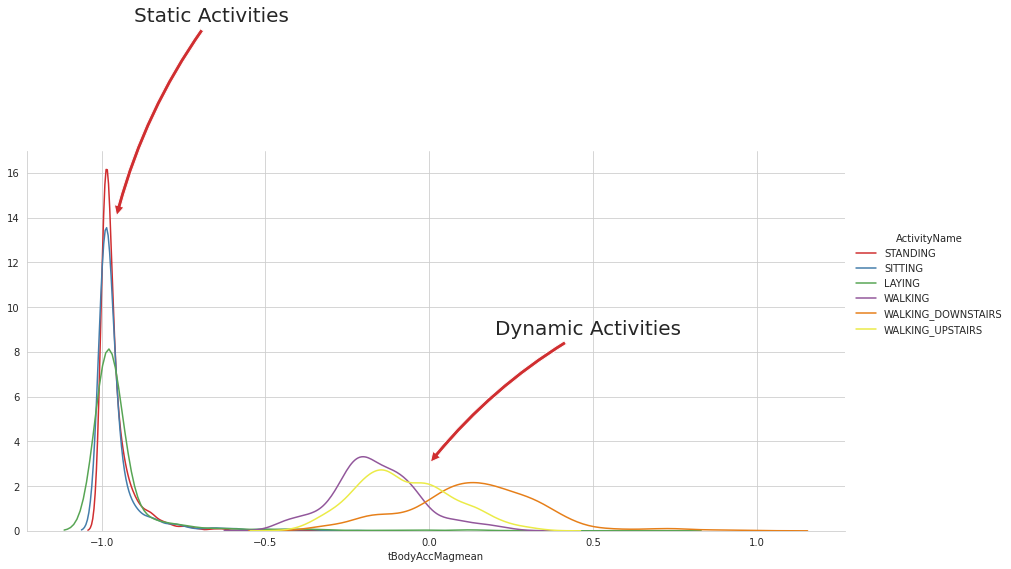

In [ ]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Static Activities", xy=(-0.956,14), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Dynamic Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

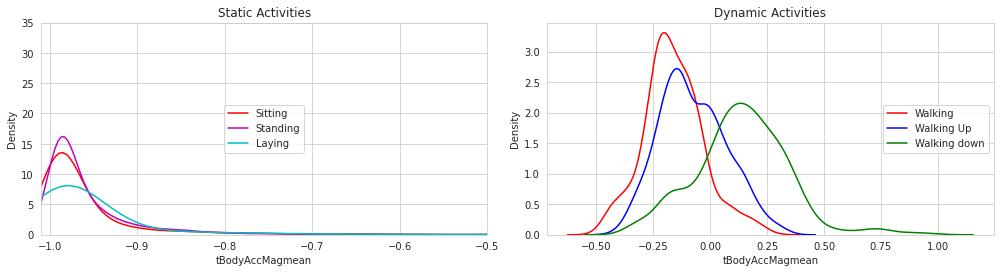

In [ ]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Static Activities')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Dynamic Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

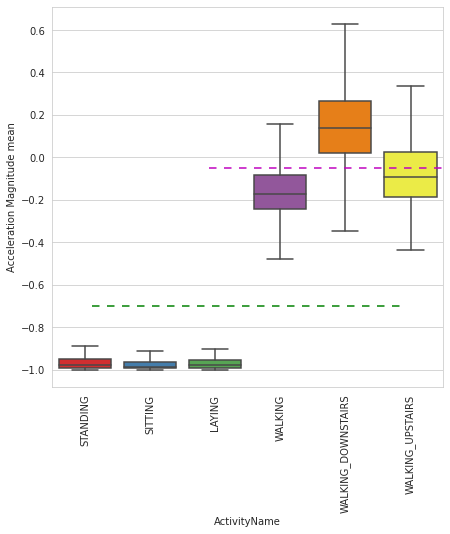

In [ ]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()


__ Observations__:
- Jika tAccMean <-0.8 maka Aktivitasnya adalah Standing atau Sitting atau Laying.
- Jika tAccMean> -0.6 maka Aktivitasnya adalah Walking atau WalkingDownstairs atau WalkingUpstairs.
- Jika tAccMean> 0.0 maka Activity adalah WalkingDownstairs.

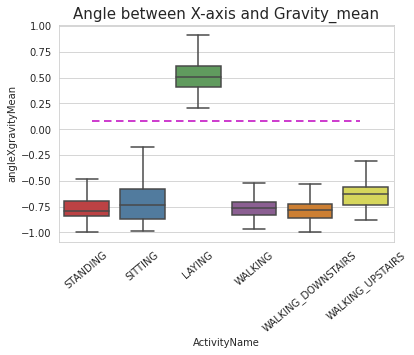

In [ ]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data = train, showfliers=False)
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9, dashes=(5,3), c='m')
plt.show()

__ Observations__:
* Jika angleX, gravityMean> 0 maka Activity is Laying.


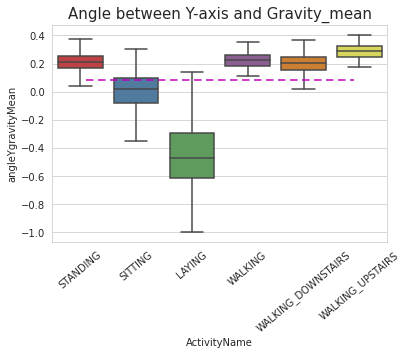

In [ ]:
sns.boxplot(x='ActivityName', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9, dashes=(5,3), c='m')
plt.show()

**Apply t-sne on the data**

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['o', 'x', '^', '+', '*', '8'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')


performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.583s...
[t-SNE] Computed neighbors for 7352 samples in 45.058s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635854
[t-SNE] Computed conditional probabilities in 0.055s
[t-SNE] Iteration 50: error = 124.6829071, gradient norm = 0.0285248 (50 iterations in 12.427s)
[t-SNE] Iteration 100: error = 107.0548782, gradient norm = 0.0290438 (50 iterations i

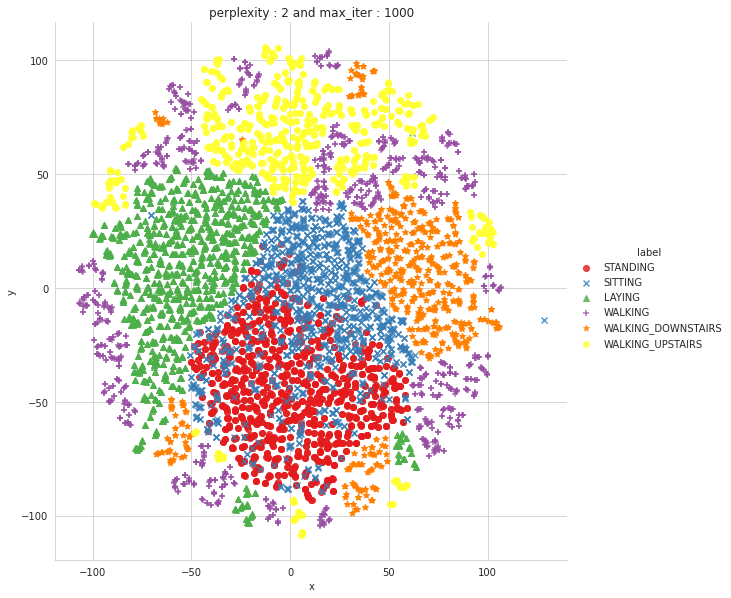

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.586s...
[t-SNE] Computed neighbors for 7352 samples in 44.342s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.076s
[t-SNE] Iteration 50: error = 114.0973282, gradient norm = 0.0194458 (50 iterations in 4.378s)
[t-SNE] Iteration 100: error = 97.5584106, gradient norm = 0.0150299 (50 iteratio

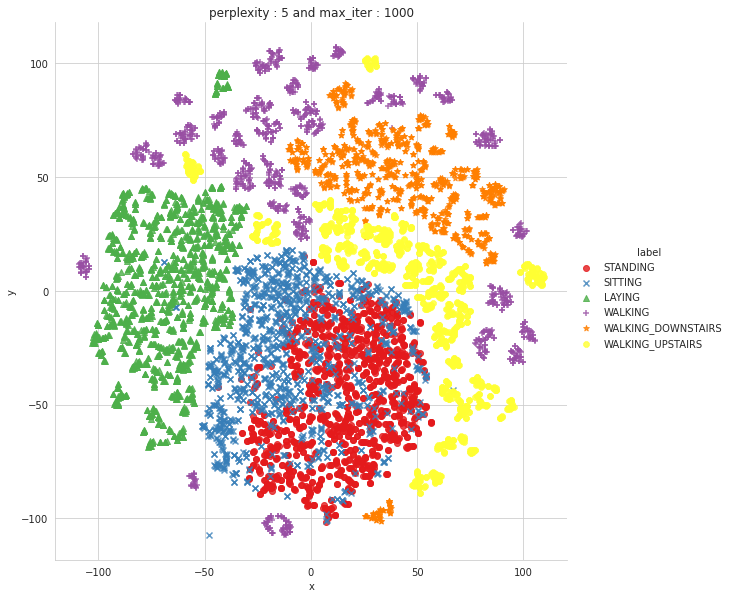

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.581s...
[t-SNE] Computed neighbors for 7352 samples in 44.771s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.135s
[t-SNE] Iteration 50: error = 105.9937439, gradient norm = 0.0191689 (50 iterations in 3.635s)
[t-SNE] Iteration 100: error = 90.2800903, gradient norm = 0.0098029 (50 iterati

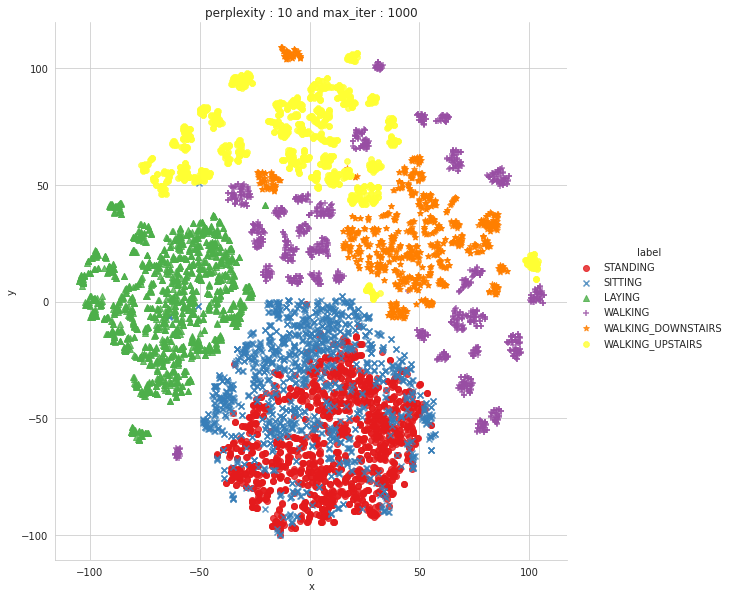

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.595s...
[t-SNE] Computed neighbors for 7352 samples in 45.543s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.265s
[t-SNE] Iteration 50: error = 97.6869736, gradient norm = 0.0162161 (50 iterations in 4.015s)
[t-SNE] Iteration 100: error = 84.1855240, gradient norm = 0.0068157 (50 iteratio

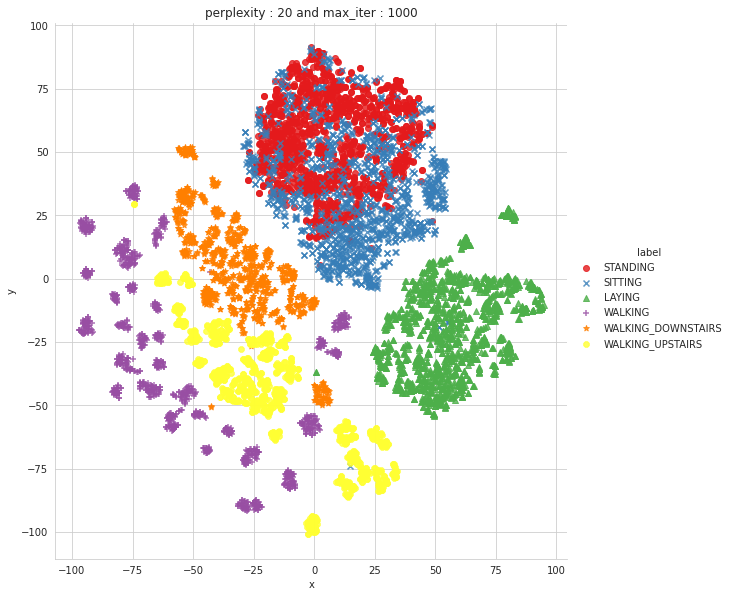

Done

performing tsne with perplexity 30 and with 1000 iterations at max
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.583s...
[t-SNE] Computed neighbors for 7352 samples in 46.341s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.348516
[t-SNE] Computed conditional probabilities in 0.406s
[t-SNE] Iteration 50: error = 92.3211899, gradient norm = 0.0251470 (50 iterations in 6.770s)
[t-SNE] Iteration 100: error = 80.3773193, gradient norm = 0.0051567 (50 iteratio

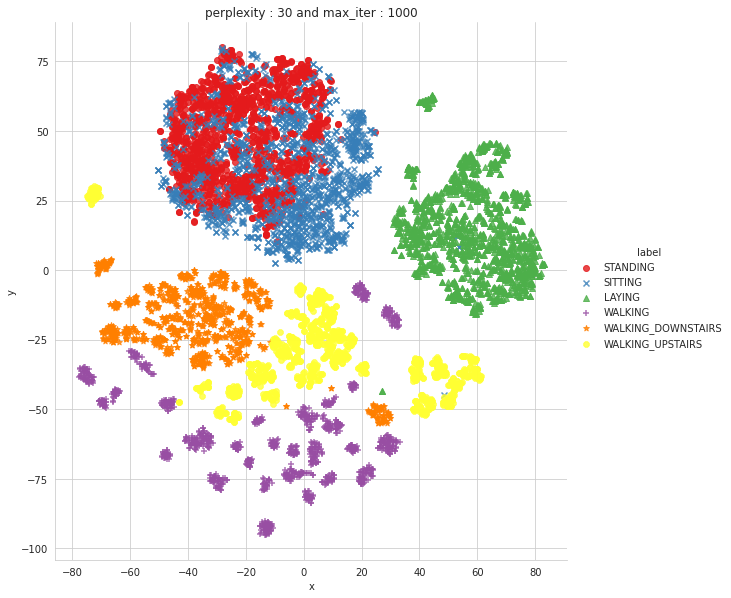

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.581s...
[t-SNE] Computed neighbors for 7352 samples in 46.988s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.662s
[t-SNE] Iteration 50: error = 84.5294037, gradient norm = 0.0352751 (50 iterations in 5.331s)
[t-SNE] Iteration 100: error = 75.5709610, gradient norm = 0.0047542 (50 iterati

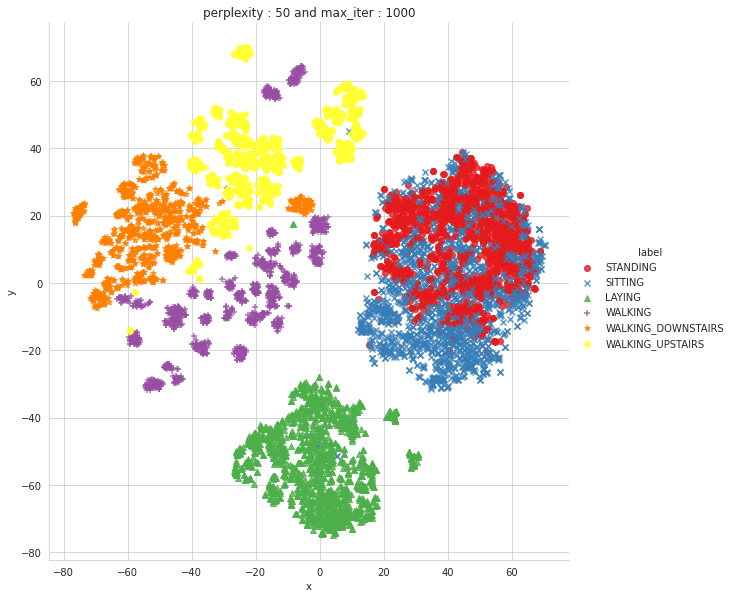

Done

performing tsne with perplexity 100 and with 1000 iterations at max
[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.595s...
[t-SNE] Computed neighbors for 7352 samples in 48.564s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.559265
[t-SNE] Computed conditional probabilities in 1.340s
[t-SNE] Iteration 50: error = 78.2882156, gradient norm = 0.0194929 (50 iterations in 5.184s)
[t-SNE] Iteration 100: error = 68.5562134, gradient norm = 0.0030942 (50 iterat

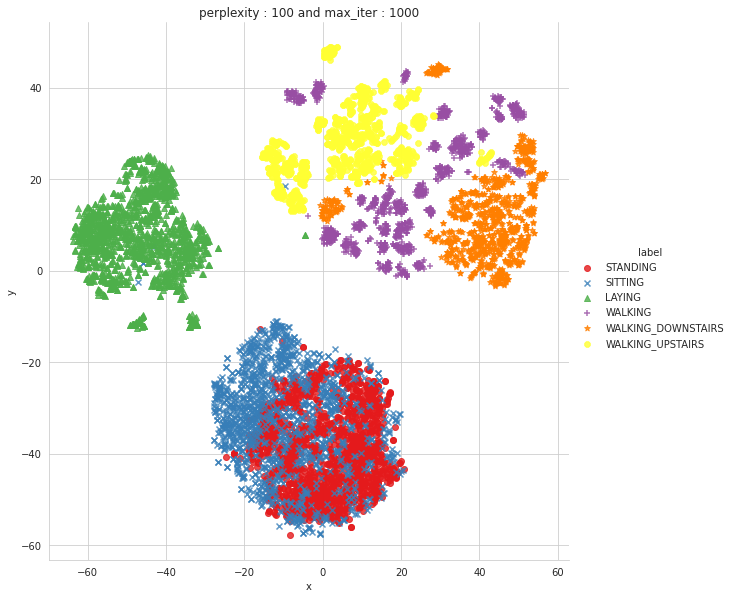

Done


In [ ]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2, 5, 10, 20, 30,50, 100])